In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('tmdb-movies.csv')

In [23]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# 1 Data Cleaning

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [25]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [26]:
df.vote_average

0        6.5
1        7.1
2        6.3
3        7.5
4        7.3
        ... 
10861    7.4
10862    5.7
10863    6.5
10864    5.4
10865    1.5
Name: vote_average, Length: 10866, dtype: float64

In [27]:
df.duplicated().sum()

1

### 1.1 Dropping the dublicated row

In [28]:
df.drop_duplicates(inplace = True)
df.duplicated().any()

False

### 1.2 Check for dataframe columns

In [29]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [30]:
df.shape

(10865, 21)

In [31]:
df.drop(['id', 'imdb_id', 'homepage', 'revenue_adj', 'budget_adj', 'tagline', 'cast', 'overview', 'keywords', 'production_companies', 'director', 'release_date'], axis = 1, inplace = True)

In [32]:
df.shape

(10865, 9)

In [33]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


In [34]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [35]:
df.dropna(inplace=True)
df.isnull().any().sum()

0

### 1.3 Genres columns '|'

In [36]:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

In [37]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015


### 1.4 Calculate Profit. {Profit = revenue - budget}

In [38]:
df['profit'] = df.revenue - df.budget

In [40]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015,1316249360


### 1.5 Categorizing vote_average columns

In [80]:
def categorize_col (df, col, labels):
    edges = [
                df[col].describe()['min'],
                df[col].describe()['25%'],
                df[col].describe()['50%'],
                df[col].describe()['75%'],
                df[col].describe()['max']
            ]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

### 1.6 Converting vote_avg into a categorical variable

In [47]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_col(df, 'vote_average', labels)

df['vote_average'].unique()

['average', 'popular', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [48]:
df.dropna(inplace = True)
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
profit            0
dtype: int64

In [49]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,average,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,popular,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,average,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,popular,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,popular,2015,1316249360


### 1.7 Converting profit into a categorical value

In [50]:
labels = ['low', 'average', 'high']
categorize_col(df, 'profit', labels)

df['profit'].unique()

['high', 'average', 'low', NaN]
Categories (3, object): ['low' < 'average' < 'high']

In [51]:
df.dropna(inplace = True)
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
profit            0
dtype: int64

In [52]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,average,2015,high
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,popular,2015,high
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,average,2015,high
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,popular,2015,high
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,popular,2015,high


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10864
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   popularity      10839 non-null  float64 
 1   budget          10839 non-null  int64   
 2   revenue         10839 non-null  int64   
 3   original_title  10839 non-null  object  
 4   runtime         10839 non-null  int64   
 5   genres          10839 non-null  object  
 6   vote_count      10839 non-null  int64   
 7   vote_average    10839 non-null  category
 8   release_year    10839 non-null  int64   
 9   profit          10839 non-null  category
dtypes: category(2), float64(1), int64(5), object(2)
memory usage: 783.6+ KB


# 2. Exploratory Data Analysis

### Q1. Do movies with high popularity achieve high revenues?

In [55]:
# get median of popularity to compare with
df['popularity'].mean()

0.6476021913460651

In [56]:
# split popular movies into two groups around the median
less_popular = df.query('popularity <= 0.647')
more_popular = df.query('popularity > 0.647')

In [57]:
# get mean quality revenue for the less and more popularity groups
print(less_popular.revenue.mean(), more_popular.revenue.mean())

7689823.871224779 121933819.08567691


It's now very much evident that movies with more popularity achieve high revenues

### Q2. What are the most filmed genres in this whole dataset?

In [72]:
df['genres'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

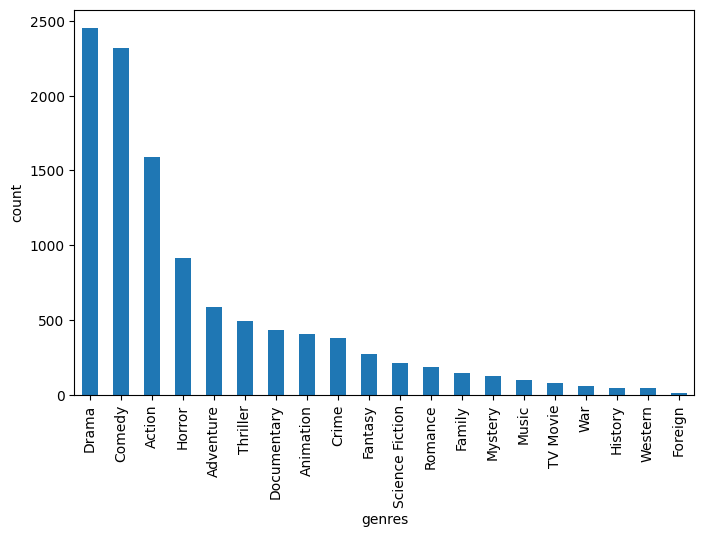

In [77]:
plt.figure(figsize=(8,5))
df['genres'].value_counts().plot(kind='bar')
plt.xlabel('genres')
plt.ylabel('count')
plt.show()

In [78]:
df['genres'].describe()

count     10839
unique       20
top       Drama
freq       2453
Name: genres, dtype: object

### Q3. Is there a correlation btw a movie budget and its revenue?

Text(0, 0.5, 'revenue')

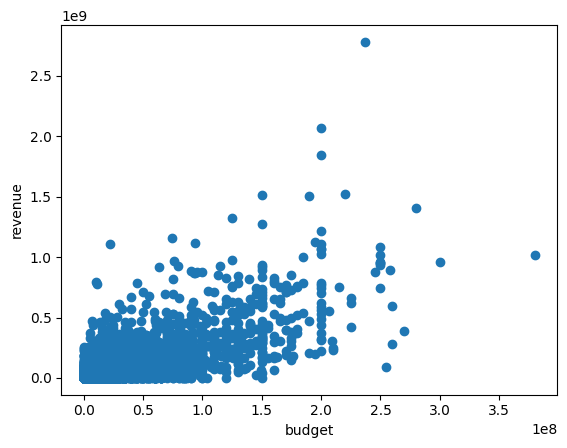

In [79]:
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')